In [1]:
import os
import data_loader as dl
import correlation_plot as cp
import profile_plot as dp
import express_statistic_plot as es
import trf_type_barplot as tt
import read_statistic as rs
import mismatches_plot as mp
import pylab
import pandas as pd
import numpy as np

pd.options.plotting.backend = "plotly"
%matplotlib inline

'''
# Visualization module of tRNAExploer (v1.0) 
# The visual configure file
'''
#visual_config = "/Users/hqyone/PycharmProjects/data_output/server2/visual_config.tsv"
#visual_config = "/Users/hqyone/PycharmProjects/data_output/tRNA_seq/output/visual_config.tsv"
#visual_config = "/Users/hqyone/PycharmProjects/data_output/cancer/output/visual_config.tsv"
wdir = '/Users/hqyone/PycharmProjects/tRNAExplorer/test/output'
visual_config = wdir+"/visual_config.tsv"


if not os.path.isfile(visual_config):
    print("Can't find config file. Abort !")
    exit(-1)

# If you don't set report_dir, the default path will be <output_dir>+"/reports"
report_dir = ""

# Loading data
d =  dl.LoadConfig(visual_config, report_dir)

/Users/hqyone/PycharmProjects/tRNAExplorer/test/output/static.log


0.11.0
      #SampleID          tRNA_family           tRNA_ID    ID  Position  \
0    SRR1836127  TF_tRNA-Glu-CTC-1-1  tRNA-Glu-CTC-1-6  P131        71   
1    SRR1836127  TF_tRNA-Glu-CTC-1-1  tRNA-Glu-CTC-1-6   P59        -1   
2    SRR1836127  TF_tRNA-Glu-CTC-1-1  tRNA-Glu-CTC-1-7  P131        71   
3    SRR1836127  TF_tRNA-Glu-CTC-1-1  tRNA-Glu-CTC-1-7   P59        -1   
4    SRR1836127  TF_tRNA-Glu-CTC-1-1  tRNA-Glu-CTC-1-4  P131        71   
..          ...                  ...               ...   ...       ...   
300  SRR1836125  TF_tRNA-Lys-TTT-3-1  tRNA-Lys-TTT-3-4   P96        36   
301  SRR1836125  TF_tRNA-Lys-TTT-3-1  tRNA-Lys-TTT-3-4  P132        72   
302  SRR1836125  TF_tRNA-Lys-TTT-3-1  tRNA-Lys-TTT-3-5   P96        36   
303  SRR1836125  TF_tRNA-Lys-TTT-3-1  tRNA-Lys-TTT-3-5  P132        72   
304  SRR1836125  TF_tRNA-Val-CAC-1-1  tRNA-Val-CAC-5-1  P132        72   

         PType  Intensity  Intensity_5  Intensity_3  SNRatio     Seq_5  \
0          End        183     

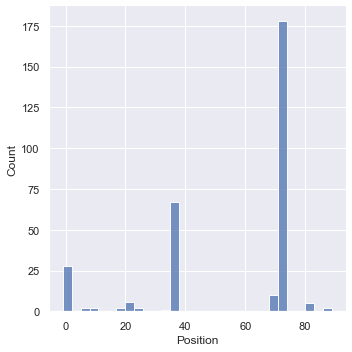

In [12]:
import seaborn as sns
print(sns.__version__)
data =d["cleavage_df"]
print(data[data['Intensity']>100])
sns.displot(data, x="Position", binwidth=3)
print(data.groupby(by='PType').agg('count'))

In [ ]:
'''
    The function creates a correlation matrix to show the relationship between samples
    @param d:  The data object generated by data_loader.py
    @param type: "count"/"pileup" the matrix used for calculated correlation matrix. "count" means using read counts or
                 "pileup" means use the max depth of pileup to indicate abundance and calculate the matrix.
    @param label: "des" label with sample description or others with ID of samples.
    @param groupby: group by can be "CODE_AA","AA","CODE","#tRNA_family","tRNA_ID"
                    It determines the way summing the value based on the column and then calculate correlation.
    @param method: The method to calculate correlation (pearson, kendall, spearman)
    @param fig_size: The size of fig
    @param font_size: The size of text in matrix
    @return: None
'''
cp.drawCorrMatrixPic(d,
                     type="count", 
                     label="des",
                     groupby="#tRNA_family",
                     method="pearson",
                     fig_size = 12,
                     font_size=14)

In [ ]:
'''
    Draw tRF profiles for each tRNA across samples
    @param d: The data object generated by data_loader.py
    @param groupby: F(Family)/Other(tRNA genes)
    @param test: Number, If >0 will prints the n profile for testing
                 or print all profiles in output_dir
    @param output_dir: The output directory. The default is <output_dir>/reports
    @param min_depth: The minimum depth of pileup for a sample to print the profile (Default 20)
    @param share_y_lim: Whether all profiles share the same depth limitation across samples (Default True)
    @param normalized: whether normalize to the number of total tRNA mapped reads (Default True)
    @return:
'''
dp.drawProfiles(d, 
                groupby ='F',
                fig_num = 4,
                output_dir="",
                min_depth=20,
                share_y_lim = True,
                normalized = False
                )

In [ ]:
'''
    Create two stack bar charts to show the composition of tRFs in samples
    @param d: The data object generated by data_loader.py
    @param fontsize: The size of font of x, y axis and labels
    @return: None
'''
tt.drawTrfDistForSamples(d, 18)

In [ ]:
'''
    Create two stack bar charts to show the composition of tRFs for each acceptor in a samples
    @param d: The data object generated by data_loader.py
    @param font_size: The size of font, default 18
    @param test: Boolean, If true only print the stack bar charts for first sample for testing purposes
                 or print all profiles in output_dir with <report_dir> + "/" + s_id + '_aa.png'
    @return: None
'''
tt.drawTrfDistForAcceptorsInSamples(d, font_size= 18, test=False)

In [ ]:
'''
    Create a box plot to compare expression level of tRFs in multiple levels
    The program will calculate max_exp (max value of expression), exp_samples_num (The number of sample expressed the tRF)
    or median_exp (median expression across samples) and then group by certain features set by "groupby"
    to plot a box plot to compare expression between different groups
    @param d: The data object generated by data_loader.py
    @param min_exp_cutoff: The minimum of read count for a sample to express the tRFs
    @param sample_ls: A list of IDs of selected sample, if it is empty, it will use all data from all available samples
    @param groupby: feature for group can be one of them ["Type","exp_samples","tRNA_families","CODE","CODE_AA","AA"]
    @param value: The way to calculate the expression ["]median_exp","exp_samples_num","max_exp"]
    @param fontsize: Font size (Default 14)
    @param fig_w: weight of figure (12)
    @param fig_h: height of figure (8)
    @return: None
'''
sample_ls=[]
# sample_ls=['ENCFF126QMV.sorted,ENCFF338LGX.sorted,ENCFF848JOE.sorted,ENCFF894FTI.sorted,ENCFF536JJC.sorted']
# groupby can be "Type","CODE_AA","AA","CODE","tRNA_families","CODE_AA"

es.drawExpBoxPlotForGroup(d,
                          min_exp_cutoff=50,
                          sample_ls=sample_ls, 
                          title="title3",
                          groupby="CODE_AA",
                          value="median_exp",
                          fontsize = 16,
                          fig_w = 12,
                          fig_h = 8
                         )



In [ ]:
'''
    Create expression matrix of tRNA/Group/Acceptors vs samples
    The expression levels were transformed by log10
    @param d: The data object generated by data_loader.py
    @param figure: Absolute path of output figure, Default : report_dir+"/exp_matrix.png"
    @param sample_ls: selected sample ID list, if it is empty, it will use all data from all available samples
    @param groupby: "tRF_First_Type","CODE_AA","AA","CODE","tRNA_Families","CODE_AA","tRNA_ID"
    @param xl_method: the linkage method for x axis
    @param yl_method: the linkage method for y axis
    @param xaxis_font_size: the linkage method for x axis
    @param yaxis_font_size: the linkage method for y axis
    @param cmap: the colormap of the matrix
    @param fontsize: Font size (Default 14)
    @param fig_w: weight of figure (12)
    @param fig_h: height of figure (18)
    @return: None
'''

# sample_ls=['SRR1836127','SRR1836126','SRR1836128','SRR1836129','SRR1836123']
sample_ls=[]
es.drawExpMatrixForFamily(d,
                          figure = "matrix.png",
                          sample_ls = sample_ls,
                          groupby='AA',
                          xl_method = "single",
                          yl_method = "centroid", #single
                          xaxis_font_size=12,
                          yaxis_font_size=12,
                          cmap=pylab.cm.YlGnBu,
                          fig_w = 12,
                          fig_h = 18
                          )



In [ ]:
'''
    Create expression matrix of tRFs vs samples
    The expression levels were transformed by log10
    @param d: The data object generated by data_loader.py
    @param figure: Absolute path of output figure, Default : report_dir+"/exp_matrix.png"
    @param sample_ls: selected sample ID list, if it is empty, it will use all data from all available samples
    @param xl_method: the linkage method for x axis
    @param yl_method: the linkage method for y axis
    @param xaxis_font_size: the linkage method for x axis
    @param yaxis_font_size: the linkage method for y axis
    @param cmap: the colormap of the matrix, the list can be found at 
        https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    @param fig_w: weight of figure (12)
    @param fig_h: height of figure (18)
    @param min_int: minimum of the mean read counts of tRF 
    @return: None
'''
# sample_ls=['SRR1836127','SRR1836126','SRR1836128','SRR1836129','SRR1836123']

sample_ls=[]
es.drawTrfExpMatrixForSample(d,
                            figure = "trf_matrix.png",
                            sample_ls = sample_ls,
                            xl_method = "single",
                            yl_method = "centroid", #single
                            xaxis_font_size=12,
                            yaxis_font_size=12,
                            cmap=pylab.cm.jet,
                            fig_w = 12,
                            fig_h = 28,
                            min_int = 10
                          )




In [ ]:
'''
    Draw bar charts for Type/Count of tRF for each samples
    @param d: The data object generated by data_loader.py
    @param sample_ls: selected sample ID list
    @param type: 'read_count' for draw bar chart for read count, others will draw tRF types
    @return:
'''
sample_ls=[]
#sample_ls=['ENCFF536JJC.sorted','ENCFF656GZF.sorted','ENCFF894FTI.sorted','ENCFF110BEH.sorted']
es.drawTrfLengthDistribution(d,
                             sample_ls=sample_ls,
                             type="read_count"
                             )


In [ ]:
'''
    Some post-ranscriptional modifications on tRNAs will result in mismatches in NGS data
    The function 
        1)Generates a tsv file containing details about mismatch information for tRNA families across samples.
        2)Create bar charts for the distribution of mutation ratio for each sample.
        3)Creates mismatch ratio matrix for tRNA family (mutation location vs samples).
    @param d:  The data object generated by data_loader.py
    @param tRNA_families: a list of the name of tRNA families which will show in the matrixes, if it 
                          empty all avaliable tRNA families will be shown in the matrix
    @param max_ratio_cutoff: only mismatch sites with mismatch ratio above the cutoff in at 
                            least one sample will be repoted
    @param mean_read_cutoff: The minimal of mean read number across samples to 
                            filter out sites with very few reads
    @param draw_fig: whether draw bar charts for distribution of mutation ratio for each sample
    @param test: If test is true, only draw three matrixes for testing.
    @return: None
'''

mp.drawMismatchMatrixByFamily(d, 
                              tRNA_families=[], 
                              max_ratio_cutoff=0.1, 
                              mean_read_cutoff=0, 
                              draw_fig=False, 
                              test=True)

In [ ]:
'''
    Some post-ranscriptional modifications on tRNAs will result in mismatches in NGS data
    The function 
        1)Generates a tsv file containing details about mismatch information for tRNA families across samples.
        2)Create bar charts for the distribution of mutation ratio for each sample.
        3)Creates mismatch ratio matrix for tRNA family (mutation location vs samples).
        4)Create two tsv files about mismatch ratio and unireads numbers matrixes (samples vs sites of tRNA families) 
    @param d:  The data object generated by data_loader.py
    @param loc_ref: The ref base on the location in tRNA
    @param loc_site_ls: a list of possible location in mature tRNA
    @param loc_name: The name of the sites which will be shown in the 
    @param row_sum_cutoff: The minimal of the sum of each row in the matrix to filter out some tRNA families with
                           limited data                
    @param tRNA_families: a list of the name of tRNA families which will show in the matrixes, if it 
                          empty all avaliable tRNA families will be shown in the matrix
    @param max_ratio_cutoff: only mismatch sites with mismatch ratio above the cutoff in at 
                            least one sample will be repoted
    @param mean_read_cutoff: The minimal of mean read number across samples to 
                            filter out sites with very few reads
    @param draw_fig: whether draw bar charts for distribution of mutation ratio for each sample
    @param test: If test is true, only draw three matrixes for testing.
    @return: None
    
    Following are some regular modification sites
    ('A', [56,57,58,59,67], A57')
    ('G', [9,10],'G9')
    ('G', [7],'G7')
    ('G', [63,64,65],'G64')
    ('A', [33,34,35],'A34')
    ('A', [36,37,38],'A37')
    ('G', [25,26,27],'G27')
'''
loc_ref = 'A'
loc_site_ls = [56,57,58,59,67]
loc_name = 'A57'
mp.drawMismatchMatrixByLocation(d,
                                loc_ref = loc_ref,
                                loc_site_ls = loc_site_ls, 
                                loc_name = loc_name, 
                                row_sum_cutoff=0, 
                                tRNA_families=[], 
                                max_ratio_cutoff=0.1, 
                                mean_read_cutoff=0, 
                                draw_fig=False, 
                                test=True)

In [ ]:
'''
    The function shows the 5' and 3' base addition modifications of tRFs.
    The function will present two tsv files to summerize 5' and 3' terminal additions
    And draw four types/columns of pie charts:
        1. Pie charts showing the ratio of tRFs with or without 5'-Addition modification
        2. Pie charts showing the composition of 5'-Addition modifications
        3. Pie charts showing the ratio of tRFs with or without 3'-Addition modification
        4. Pie charts showing the composition of 3'-Addition modifications
    @param d: The data object generated by data_loader.py
    @param proj_name: the name of project, the default is "test", use can check the name of hit.tab file
            it follows the pattern : <sampleID>+"_"+<proj_name>+"_hit.tab"
    @param top_num: The number of top addition modifications to be printed out
    @param radius: the radius of pies
    @param fontsize: font size of the title 
    @param fig_width: the width of the figure
    @param fig_height: the height of the figure
    @return: None
'''
# plotly version
rs.getAddModificationStatisitc2(d, 
                                proj_name = 'test', 
                                top_num=10,
                                fontsize=12,
                                fig_width=600,
                                fig_height=1200)



In [ ]:
'''
    The function shows the 5' and 3' base addition modifications of tRFs.
    The function will print the top 5' and 3' addition modifications
    And draw four types of pie charts:
        1. A pie chart showing the ratio of tRFs with or without 5'-Addition modification
        2. A pie chart showing the composition of 5'-Addition modifications
        3. A pie chart showing the ratio of tRFs with or without 3'-Addition modification
        4. A pie chart showing the composition of 3'-Addition modifications
    @param d: The data object generated by data_loader.py
    @param proj_name: the name of project, the default is "test", use can check the name of hit.tab file
            it follows the pattern : <sampleID>+"_"+<proj_name>+"_hit.tab"
    @param top_num: The number of top addition modifications to be printed out
    @param radius: the radius of pies
    @param fontsize:
    @param fig_width:
    @return: None

'''
# matplotlib version
rs.getAddModificationStatisitc(d, 
                                proj_name = 'test', 
                                top_num=10,
                                fontsize=14,
                                fig_width=12
                                )